In [1]:
import pandas as pd
import numpy as np
# Use raw string notation by adding an 'r' before the file path
data = pd.read_csv(r"C:\Users\MYBOOK\Downloads\existing-commercial-wireless-telecommunication-services-facilities-in-san-francisco-1 (3).csv")

# Inspect first few rows and columns
print(data.head())
print(data.info())

  Carrier       ID  Search Ring Name ID Block      Lot Zoning District  \
0    AT&T  CCL00001       Marshall Hale  1017      028            RM-2   
1    AT&T  CCL00002         Embarcadero  0237  014/016           C-3-O   
2    AT&T  CCL00005   Mercy High School  7231      003         RH-1(D)   
3    AT&T  CCL00006      Bernal Heights  3637      069  MISSION STREET   
4    AT&T  CCL00049      Marina Safeway  0503      030            RC-3   

  Hight and Bulk District Type of Building Preference (1-7)  \
0                    80-E       Commercial                7   
1                   350-S       Commercial              NaN   
2                    40-X           Public                1   
3               40-X/65-B       Commercial                6   
4               65-A/40-X       Commercial                4   

  Type of Consumer Services  ... Number of Antennas Location of BTS  \
0       voice, video & data  ...                  9        Basement   
1       voice, video & data  ...  

In [2]:
print(data.tail())

     Carrier        ID  Search Ring Name ID   Block  Lot Zoning District  \
1248  Sprint  SF25XC654         Mission Bay    3821    2              M2   
1249  Sprint  SF36XC056     Presidio Tunnel  Public  ROW             NaN   
1250  Sprint  SF60XC312    Ocean Beach Apts    1691   19            NC-S   
1251  Sprint  FS04XB013      Noe Valley DAS     NaN  NaN             NaN   
1252  Sprint  SF25XC340       Presidio Relo     NaN  NaN             NaN   

     Hight and Bulk District Type of Building Preference (1-7)  \
1248                     NaN       Industrial                3   
1249                     NaN           Public              NaN   
1250                    40-X       Commercial                4   
1251                     NaN              NaN              NaN   
1252                     NaN              NaN              NaN   

       Type of Consumer Services  ... Number of Antennas Location of BTS  \
1248  Voice & Data Transmissions  ...                  3            Ro

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Carrier                            1253 non-null   object
 1   ID                                 1253 non-null   object
 2   Search Ring Name ID                936 non-null    object
 3   Block                              1118 non-null   object
 4   Lot                                1117 non-null   object
 5   Zoning District                    1090 non-null   object
 6   Hight and Bulk District            1086 non-null   object
 7   Type of Building                   1233 non-null   object
 8   Preference (1-7)                   226 non-null    object
 9   Type of Consumer Services          1252 non-null   object
 10  Type of Consumer Products          389 non-null    object
 11  Number of Antennas                 1220 non-null   object
 12  Locati

In [4]:
data.describe

<bound method NDFrame.describe of      Carrier        ID  Search Ring Name ID   Block      Lot Zoning District  \
0       AT&T   CCL00001       Marshall Hale    1017      028            RM-2   
1       AT&T   CCL00002         Embarcadero    0237  014/016           C-3-O   
2       AT&T   CCL00005   Mercy High School    7231      003         RH-1(D)   
3       AT&T   CCL00006      Bernal Heights    3637      069  MISSION STREET   
4       AT&T   CCL00049      Marina Safeway    0503      030            RC-3   
...      ...        ...                 ...     ...      ...             ...   
1248  Sprint  SF25XC654         Mission Bay    3821        2              M2   
1249  Sprint  SF36XC056     Presidio Tunnel  Public      ROW             NaN   
1250  Sprint  SF60XC312    Ocean Beach Apts    1691       19            NC-S   
1251  Sprint  FS04XB013      Noe Valley DAS     NaN      NaN             NaN   
1252  Sprint  SF25XC340       Presidio Relo     NaN      NaN             NaN   

     

In [5]:
data.size 

26313

## DATAPROCESSING

In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(exclude=['number']).columns

# Fill missing values in numeric columns with mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check for missing values after filling
missing_values_after = data.isnull().sum()
print(missing_values_after)


Carrier                              0
ID                                   0
Search Ring Name ID                  0
Block                                0
Lot                                  0
Zoning District                      0
Hight and Bulk District              0
Type of Building                     0
Preference (1-7)                     0
Type of Consumer Services            0
Type of Consumer Products            0
Number of Antennas                   0
Location of BTS                      0
Type of Technology                   0
Radio Frequency Range (Megahertz)    0
Power Output of Equipment (Watts)    0
Height to Top of Antenna             0
Name of Community Liason             0
Phone Number of Community Liason     0
Comments                             0
Location 1                           0
dtype: int64


In [7]:
data.duplicated().sum() 

0

## Outliers

In [8]:
# Select only the numeric columns for outlier detection
numeric_data = data.select_dtypes(include=[np.number])

# Detect and remove outliers
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
numeric_data_clean = numeric_data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Merge back the non-numeric data
non_numeric_data = data.select_dtypes(exclude=[np.number])
data_clean = pd.concat([numeric_data_clean, non_numeric_data], axis=1)
print(data_clean.head())

  Carrier       ID  Search Ring Name ID Block      Lot Zoning District  \
0    AT&T  CCL00001       Marshall Hale  1017      028            RM-2   
1    AT&T  CCL00002         Embarcadero  0237  014/016           C-3-O   
2    AT&T  CCL00005   Mercy High School  7231      003         RH-1(D)   
3    AT&T  CCL00006      Bernal Heights  3637      069  MISSION STREET   
4    AT&T  CCL00049      Marina Safeway  0503      030            RC-3   

  Hight and Bulk District Type of Building Preference (1-7)  \
0                    80-E       Commercial                7   
1                   350-S       Commercial                1   
2                    40-X           Public                1   
3               40-X/65-B       Commercial                6   
4               65-A/40-X       Commercial                4   

  Type of Consumer Services  ... Number of Antennas Location of BTS  \
0       voice, video & data  ...                  9        Basement   
1       voice, video & data  ...  

In [9]:
print(data.columns)

Index(['Carrier', 'ID ', 'Search Ring Name ID', 'Block', 'Lot',
       'Zoning District', 'Hight and Bulk District', 'Type of Building',
       'Preference (1-7)', 'Type of Consumer Services',
       'Type of Consumer Products', 'Number of Antennas', 'Location of BTS',
       'Type of Technology', 'Radio Frequency Range (Megahertz)',
       'Power Output of Equipment (Watts)', 'Height to Top of Antenna',
       'Name of Community Liason', 'Phone Number of Community Liason',
       'Comments', 'Location 1'],
      dtype='object')


## 4. Exploratory Data Analysis (EDA)

In [10]:
# Convert 'Power Output of Equipment (Watts)' column to numeric, forcing invalid parsing to NaN
data['Power Output of Equipment (Watts)'] = pd.to_numeric(data['Power Output of Equipment (Watts)'], errors='coerce')

# Check for NaN values after conversion and handle them (e.g., filling with mean or dropping)
data['Power Output of Equipment (Watts)'].fillna(data['Power Output of Equipment (Watts)'].mean(), inplace=True)

# Apply log transformation to the now numeric column
data['Power Output of Equipment (Watts)'] = np.log1p(data['Power Output of Equipment (Watts)'])

# Inspect the transformed data
print(data['Power Output of Equipment (Watts)'].head())
import numpy as np


# Apply log transformation to skewed data
data['Power Output of Equipment (Watts)'] = np.log1p(data['Power Output of Equipment (Watts)'])


0    9.720226
1    9.720226
2    9.720226
3    9.720226
4    8.879472
Name: Power Output of Equipment (Watts), dtype: float64


C:\Users\MYBOOK\AppData\Local\Temp\ipykernel_11452\1845441359.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Power Output of Equipment (Watts)'].fillna(data['Power Output of Equipment (Watts)'].mean(), inplace=True)


### 1 Histogram of Target Variable

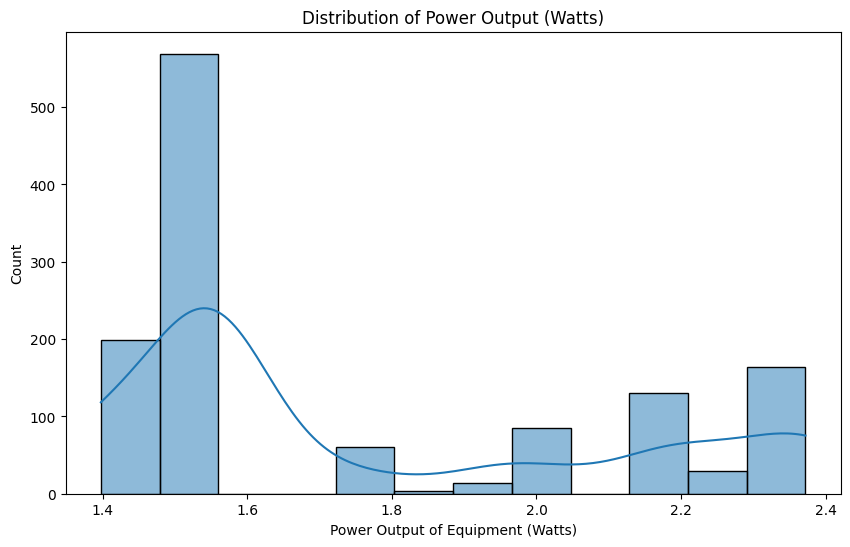

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data['Power Output of Equipment (Watts)'], kde=True)
plt.title('Distribution of Power Output (Watts)')
plt.show()


### 2 Boxplot to Detect Outliers

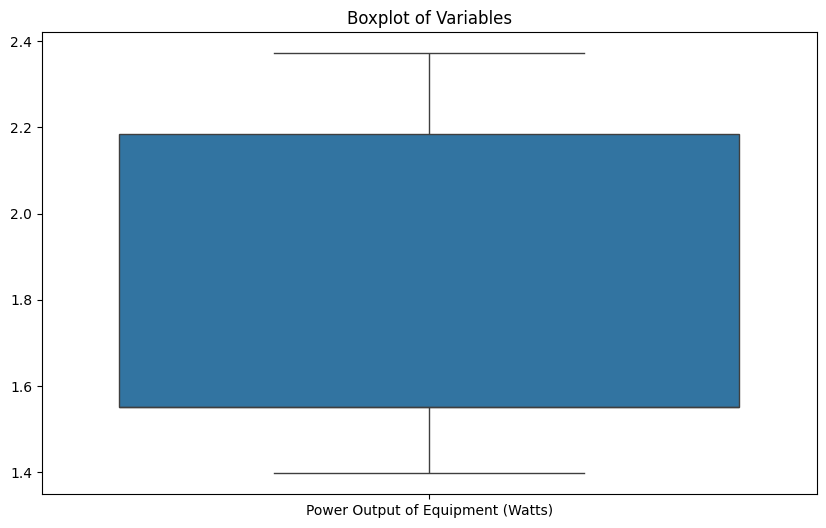

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.title('Boxplot of Variables')
plt.show()


### 3 Pair Plot for Relationships Between Variables

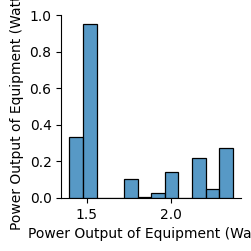

In [13]:
sns.pairplot(data)
plt.show()


### 5 KDE Plot for Target Variable

C:\Users\MYBOOK\AppData\Local\Temp\ipykernel_11452\4185171027.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Power Output of Equipment (Watts)'], shade=True)


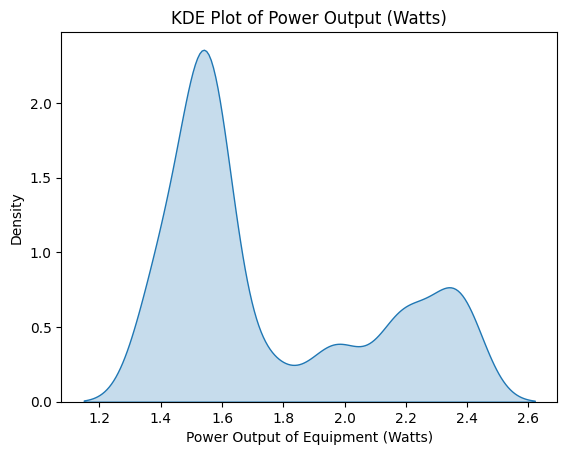

In [15]:
sns.kdeplot(data['Power Output of Equipment (Watts)'], shade=True)
plt.title('KDE Plot of Power Output (Watts)')
plt.show()


## 6. Feature Engineering

In [17]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)


## 7. Feature Selection

### We can use Random Forest or correlation analysis to select important features.

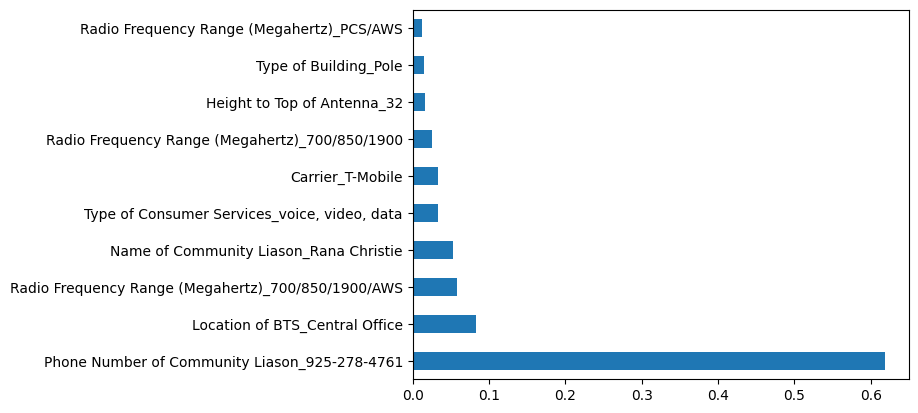

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Select K Best using RandomForest
X = data.drop('Power Output of Equipment (Watts)', axis=1)
y = data['Power Output of Equipment (Watts)']

rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.show()


## 8. Train-Test Split

### Split the data into training and testing sets. 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 9. Feature Scaling

 ### Scale numerical features to ensure they are on the same magnitude.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 10. Build and Train Regression Models
We will implement 5 different regression algorithms:

1 Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

2 Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

3 Gradient Boosting Regressor

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)


GradientBoostingRegressor()

4 SVR (Support Vector Regressor)

In [24]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)


SVR()

5 MLP Regressor

In [25]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(X_train, y_train)


MLPRegressor()

## 11. Model Evaluation
Use regression metrics like MAE, MSE, RMSE, and R² to evaluate the model's performance.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')


MAE: 0.11996605053239612, MSE: 0.0211915351447292, RMSE: 0.1455731264510356, R2: 0.8226254367630519


## 12. Hyperparameter Tuning
we can tune hyperparameters using GridSearchCV or RandomizedSearchCV.

## Hyperparameter Tuning using GridSearchCV:

In [27]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Predict using the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


## Hyperparameter Tuning using RandomizedSearchCV:

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


# Assuming 'Power Output of Equipment (Watts)' is your target variable
X = data.drop('Power Output of Equipment (Watts)', axis=1)  # Features
y = data['Power Output of Equipment (Watts)']  # Target

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (optional, depends on the model)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Define the hyperparameter grid for random search
random_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, n_jobs=-1, verbose=2)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters: {random_search.best_params_}")

# Predict using the best model
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}


In [34]:
import joblib

# Save model
joblib.dump(lr, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [35]:
y_pred_test = grid_search.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Test Set - MAE: {mae_test}, R²: {r2_test}')


Test Set - MAE: 0.005631465353985155, R²: 0.9881651472954314


**15 Interpretation of Results:**
MAE (Mean Absolute Error):
The MAE value of 0.0056 indicates that, on average, the model's predictions differ from the actual power output by approximately 0.0056 watts. This is a very low error, which suggests that the model is performing well.

R² Score:
The R² score of 0.988 indicates that the model explains 98.8% of the variance in the test set. This is a very strong result, showing that the model is highly effective at predicting the target variable.
Conclusion:
Your model is performing very well based on both metrics. The low MAE and high R² score suggest that your model generalizes well to unseen data. However, it’s important to be cautious of potential overfitting, especially with such high performance on the test set. It might be beneficial to validate the model on more datasets or perform cross-validation to ensure robustness.




**Future Work**:
Investigate Deep Learning Models for Improved Accuracy:
Although the current model performs well, exploring advanced deep learning techniques like Artificial Neural Networks (ANN), Convolutional Neural Networks (CNN) (for spatial features), or Recurrent Neural Networks (RNN) (for temporal patterns) may enhance performance, especially when handling larger datasets or more complex feature relationships.

Example Implementation: Using a simple feedforward neural network with Keras.

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss}')


C:\Users\MYBOOK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 1.8331 - val_loss: 10.4653
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.1249 - val_loss: 1.4198
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8768 - val_loss: 0.2264
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4444 - val_loss: 0.4850
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2441 - val_loss: 0.3291
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1003 - val_loss: 0.3755
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0673 - val_loss: 0.3138
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0562 - val_loss: 0.3555
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0527 - val_loss: 0.3800
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0504 - val_loss: 0.3229
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0403 - val_loss: 0.3755
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss

**Benefits**: Deep learning excels at identifying complex, non-linear patterns between features and the target variable. It is especially effective when dealing with large datasets or more intricate data types like images or sequences.

**Regularly Update the Model with New Data:**
To ensure the model stays relevant and accurate over time, it should be periodically updated as new data becomes available, reflecting any changes in the telecommunications infrastructure (e.g., new antennas or frequency bands).


**Implementation**: Set up a pipeline that periodically gathers new data and retrains the model (e.g., using a cron job or automated scripts).

In [45]:
import pandas as pd

# Load the existing dataset
existing_data = pd.read_csv(r"C:\Users\MYBOOK\Downloads\existing-commercial-wireless-telecommunication-services-facilities-in-san-francisco-1 (3).csv")

# Load the new data
new_data = pd.read_csv(r"C:\Users\MYBOOK\Downloads\new data.csv")
# Append new data to the existing dataset
data = pd.concat([existing_data, new_data], ignore_index=True)
# Convert boolean columns to integers
bool_columns = data.select_dtypes(include='bool').columns
data[bool_columns] = data[bool_columns].astype(int)
# Define features and target
X = data.drop('Power Output of Equipment (Watts)', axis=1)  # Adjust the column name as per your dataset
y = data['Power Output of Equipment (Watts)']

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Handle missing values
# 1. For numeric columns, fill missing values with the mean
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# 2. For non-numeric columns, fill missing values with a placeholder
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
data[non_numeric_columns] = data[non_numeric_columns].fillna('Unknown')

# Convert categorical features (including 'Unknown') to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Now, define features and target
X = data.drop('Power Output of Equipment (Watts)', axis=1)  # Adjust the column name if necessary
y = data['Power Output of Equipment (Watts)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor()

# Train the model on the updated dataset
model.fit(X_train, y_train)



**Address Class Imbalance Using Resampling Methods:**
If the dataset contains imbalances, where some ranges of the target variable are underrepresented, methods like Synthetic Minority Over-sampling Technique (SMOTE) or undersampling can be used to ensure the model doesn't favor the more frequent values.

**Enhance the Model by Adding New Features:**
Improving model accuracy could also involve adding new, relevant features. Examples include weather conditions, equipment upgrades, or interaction terms between existing features, all of which could better capture underlying relationships in the data